# Estatística Descritiva Básica

Nesse notebook iremos plotar os dados coletados dos alunos da sala para demonstrar:
1. O próprio ambiente, composto por Jupyter e Matplotlib
2. O formato de dados CSV
3. Alguns gráficos interessantes

Vejamos o conjunto de dados (dataset):

| nome  | idade | peso | sexo | curso           | origem          | 
|-------|-------|------|------|-----------------|-----------------| 
| TCO   | 28    | 86,1 | M    | Direito         | UFMG            | 
| GBTV  | 20    | 71   | M    | Direito         | UFMG            | 
| AO    | 18    | 99,5 | M    | Direito         | UFMG            | 
| RC    | 26    | 81   | M    | Direito         | UFMG            | 
| DSV   | 19    | 82   | M    | Direito         | UFMG            | 
| JLFN  | 22    | 80   | M    | Direito         | UFMG            | 
| GVM   | 30    | 62   | M    | Direito         | UFMG            | 
| GSSB  | 20    | 80   | M    | CE              | UFMG            | 
| GDM   | 20    | 60   | F    | Direito         | UFMG            | 
| GS    | 22    | 107  | M    | Direito         | UFMG            | 
| OFN   | 19    | 75   | M    | Direito         | UFMG            | 
| IMG   | 21    | 60,8 | F    | Direito         | UFMG            | 
| BFG   | 29    | 65,1 | F    | Direito         | público externo | 
| HFMG  | 37    | 52   | F    | Educação Física | público externo | 
| AFP   | 21    | 115  | F    | Direito         | UFMG            | 
| AGM   | 20    | 70   | M    | Direito         | UFMG            | 
| EDC   | 22    | 95   | M    | Direito         | UFMG            | 
| MFSS  | 21    | 56   | M    | Direito         | UFMG            | 
| RCO   | 27    | 70,5 | M    | Direito         | UFMG            | 
| RCVN  | 45    | 75   | F    | Direito         | público externo | 
| KCOS  | 38    | 60   | F    | Direito         | público externo | 
| VMTFC | 22    | 81   | F    | Direito         | UFMG            | 
| RASF  | 21    | 61   | M    | Direito         | UFMG            | 


Em formato CSV:

nome;idade;peso;sexo;curso;origem
TCO;28;86,1;M;Direito;UFMG
GBTV;20;71;M;Direito;UFMG
AO;18;99,5;M;Direito;UFMG
RC;26;81;M;Direito;UFMG
DSV;19;82;M;Direito;UFMG
JLFN;22;80;M;Direito;UFMG
GVM;30;62;M;Direito;UFMG
GSSB;20;80;M;CE;UFMG
GDM;20;60;F;Direito;UFMG
GS;22;107;M;Direito;UFMG
OFN;19;75;M;Direito;UFMG
IMG;21;60,8;F;Direito;UFMG
BFG;29;65,1;F;Direito;público externo
HFMG;37;52;F;Educação Física;público externo
AFP;21;115;F;Direito;UFMG
AGM;20;70;M;Direito;UFMG
EDC;22;95;M;Direito;UFMG
MFSS;21;56;M;Direito;UFMG
RCO;27;70,5;M;Direito;UFMG
RCVN;45;75;F;Direito;público externo
KCOS;38;60;F;Direito;público externo
VMTFC;22;81;F;Direito;UFMG
RASF;21;61;M;Direito;UFMG

CSV significa *[comma-separated values]*(https://en.wikipedia.org/wiki/Comma-separated_values) ou valores separados por vígula. Trata-se de um formato simples e muito utilizado para armazenamento e troca de dados. No exemplo usado acima, optamos por separar as colunas usando ponto e vírgula (*semicolon*) uma vez que temos uma coluna na qual a vírgula faz parte do próprio valor (Peso). O computador não sabe diferenciar se a vírgula participa compõe o valor ou se é um separador de coluna.

Um arquivo CSV pode ser facilmente importado em qualque programa de Planilhas (LibreOffice Calc, e.g., ou outros concorrentes comerciais).

Esse formato pode, também, ser manipulado nativamente em Python, como veremos a seguir.

In [14]:
import csv
 
csv.register_dialect('jurimetria', delimiter=';', quoting=csv.QUOTE_NONE)
csv_file = 'dados_alunos.csv'

with open(csv_file) as csv_file:
    dr = csv.DictReader(csv_file, dialect='jurimetria')
    idades = list()
    pesos = list()
    for row in dr:
        idades.append(float(row['idade']))
        peso = row['peso'].replace(',', '.')
        pesos.append(float(peso))
        
print(idades)
print(pesos)

[28.0, 20.0, 18.0, 26.0, 19.0, 22.0, 30.0, 20.0, 20.0, 22.0, 19.0, 21.0, 29.0, 37.0, 21.0, 20.0, 22.0, 21.0, 27.0, 45.0, 38.0, 22.0, 21.0]
[86.1, 71.0, 99.5, 81.0, 82.0, 80.0, 62.0, 80.0, 60.0, 107.0, 75.0, 60.8, 65.1, 52.0, 115.0, 70.0, 95.0, 56.0, 70.5, 75.0, 60.0, 81.0, 61.0]


In [15]:
idade_media = sum(idades) / len(idades)
print(idade_media)

24.695652173913043


In [5]:
# This line configures matplotlib to show figures embedded in the notebook, 
# instead of opening a new window for each figure. More about that later. 
# If you are using an old version of IPython, try using '%pylab inline' instead.
%matplotlib inline

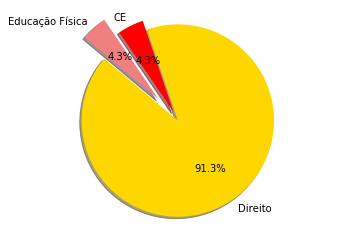

In [8]:
import csv
import matplotlib.pyplot as plt
 
csv.register_dialect('jurimetria', delimiter=';', quoting=csv.QUOTE_NONE)

csv_file = 'dados_alunos.csv'

with open(csv_file) as csv_file:
    dr = csv.DictReader(csv_file, dialect='jurimetria')
    direito = 0
    CE = 0
    educacao_fisica = 0
    
    for row in dr:
        if row['curso'] == 'Direito': direito += 1
        if row['curso'] == 'CE': CE += 1
        if row['curso'] == 'Educação Física': educacao_fisica += 1
    
    
    # Data to plot
labels = 'Direito', 'CE', 'Educação Física'
sizes = [direito, CE, educacao_fisica]
colors = ['gold', 'red', 'lightcoral']
explode = (0, 0.1, 0.3)  # explode last slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()


    
    
    